# Given

A small dataset with flat sizes (x) and flat prices (y):<br>

| x - Size (1000 sqft)     | y - Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

<br>
Two data points for simplicity - a house with 1000 square feet sold for $300,000 and a house with 2000 square feet sold for $500,000.


# Find
Linear regression function by minimizing squared error

# Solution

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.array([1,2])
y = np.array([300,500])

m = x.shape[0]

### Define Loss and Cost functions

$$Loss_i(w,b) = f_{w,b}(x_{i}) - y_{i}$$
$$J(w,b) = \frac{1}{2m}\sum\limits^{m} Loss_i(w,b)^2$$

In [4]:
def CalculateLoss(w, b):
    
    loss = np.dot(x, w) + b - y
    cost = np.sum(loss**2) / 2 / m
    
    return loss, cost

### Calculate gradient vectors

$$\frac{\partial J(\mathbf{w},b)}{\partial w}  = \frac{1}{m} \sum\limits^{m} Loss_{i}(w,b) \cdot x_{i}$$
$$\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits^{m} Loss_{i}(w,b)$$

In [5]:
def CalculateGradient(w, b):
    
    loss, cost = CalculateLoss(w, b)

    dJ_dw = np.dot(loss, x) / m
    dJ_db = np.sum(loss) / m

    return dJ_dw, dJ_db, cost

### Run GD

In [6]:
def GD(iterations = 1000, alpha = 0.01):

    # initial w & b

    w = np.random.uniform(0,10)
    b = np.random.uniform(0,10)

    # GD
    log = []

    i = 0

    while i < iterations:

        dJ_dw, dJ_db, cost = CalculateGradient(w, b)

        log.append([i, w, b, cost, dJ_dw, dJ_db])

        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db

        i += 1

    log = np.array(log, dtype="object")

    return w, b, log

# Answer

In [7]:
w, b, log = GD()
print(f"Linear regression: y = x * {int(w)} + {int(b)}")

Linear regression: y = x * 194 + 109


### Convergence path

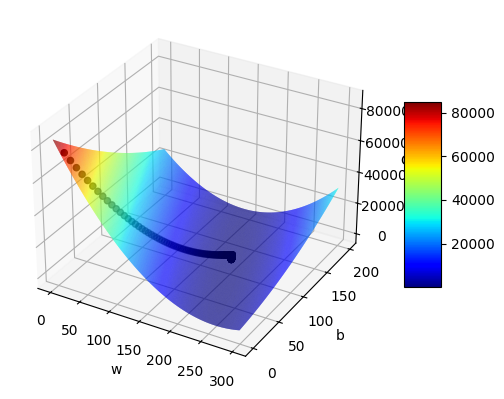

In [8]:
# Surface

surf = []

for w_ in range (0, 300):
    for b_ in range (0, 200):
        _, cost = CalculateLoss(w_, b_)
        surf.append([w_,b_,cost])

surf = np.array(surf)


# Chart

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("Cost")

from matplotlib import cm
w_b_surface = ax.plot_trisurf(surf[:,0], surf[:,1], surf[:,2], cmap=cm.jet, linewidth=0)
fig.colorbar(w_b_surface, shrink=0.5, aspect=5)

ax.scatter(log[:,1],log[:,2],log[:,3], c='black')

### Speed of Convergence

Text(0, 0.5, 'Cost')

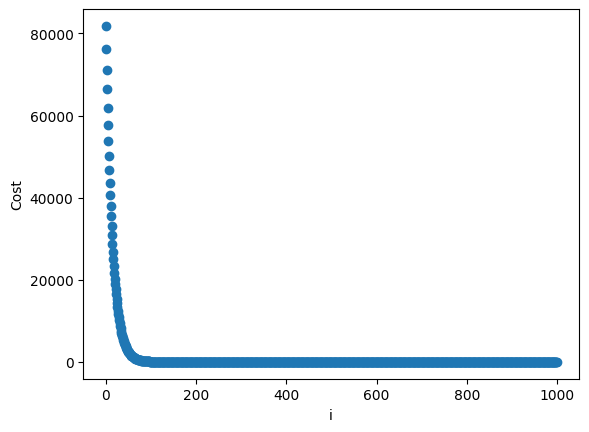

In [ ]:
fig, ax = plt.subplots()
ax.scatter(log[:,0], log[:,3])
ax.set_xlabel("i")
ax.set_ylabel("Cost")